<div dir=rtl>
<font size = "6">قبل از هر کاری، با استفاده از مسیری که در خط پایین ذکر شده، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.</font>
</div>

<div>
<font size = "4">
File --> Save a copy in Drive
</font>
</div>

# Question 0: Run the cell below without modifying it.

<div dir=rtl>
<font size = "6">بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید.</font>
</div>

In [1]:
#@title Downloading the necessary data for this homework
!pip install pydicom
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37' -O 'HW1_data.zip'
!unzip HW1_data.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.5 MB/s eta 0:00:00
--2023-11-03 16:34:09--  https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37
Resolving drive.google.com (drive.google.com)... 64.233.187.113, 64.233.187.139, 64.233.187.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8rgc1hl53nnmtgcp0kmbab8oqjnikdej/1699029225000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=c38c6edd-1d5a-4ded-a449-d223333164e5 [following]
--2023-11-03 16:34:10--  https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8rgc1hl53nnmtgcp0kmbab8oqjnikdej/1699029225000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=c38c6edd-1d5a-4ded-a449-d223333164e5
Resolving doc-0k-2g-docs.google

# The Imports

In [2]:
###
# ENTER YOUR CODE HERE.
###
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import pydicom

# Any Helper Functions

<div dir=rtl>
<font size = "6">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ای (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید.</font>
</div>

In [ ]:
###
# ENTER YOUR CODE HERE.
###

# Question 4: (20%)

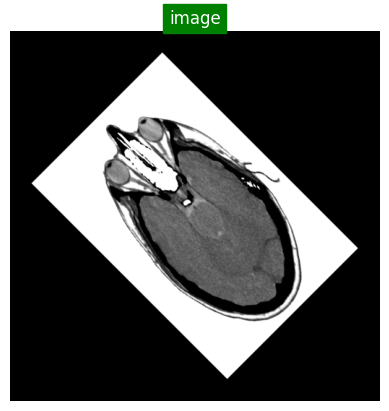

In [3]:
#@title Q4 - Part 1 (25%)
###
# ENTER YOUR CODE HERE.
###
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/transformed.png")
#cv2_imshow(image)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

Q4 - Part 1 Explanation:
<div dir=rtl>
<font size = "5">به وسیله ماتریس تبدیل  rotation  و  scaling میتوان به این تصویر رسید.</font><br />
</div>

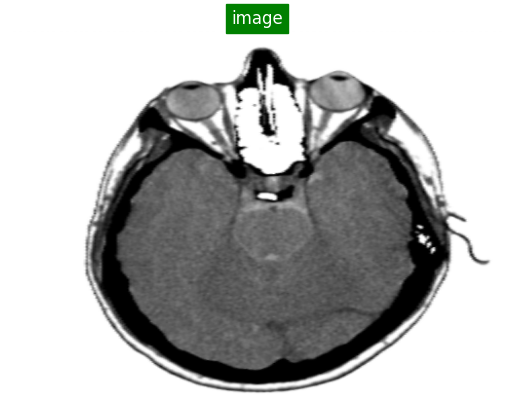

In [4]:
#@title Q4 - Part 2 (40%)
###
# ENTER YOUR CODE HERE.
###
M = cv2.getRotationMatrix2D(((image.shape[1]-1)/2.0,(image.shape[0]-1)/2.0),-45,1)
new_image = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
new_image = cv2.warpAffine(new_image,np.float32([[1,0,-129],[0,1,-65]]),(254,380))
new_image = cv2.resize(new_image,None,fx=2, fy=1, interpolation = cv2.INTER_CUBIC)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

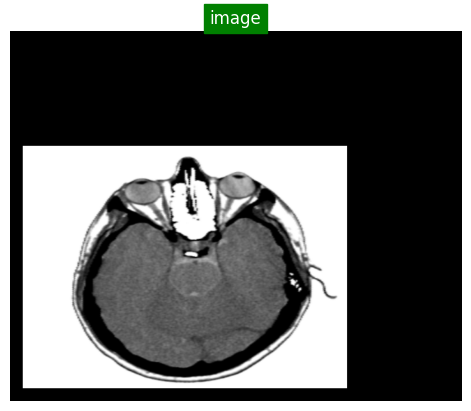

In [5]:
#@title Q4 - Part 3 (35%)
###
# ENTER YOUR CODE HERE.
###
new = cv2.copyMakeBorder(new_image,100,100,100,100,cv2.BORDER_CONSTANT,value=[0,0,0])
M = np.float32([[1,0,-80],[0,1,80]])
dst = cv2.warpAffine(new,M,(new.shape[1],new.shape[0]))

plt.imshow(dst, cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

# Question 5: (20%)

<class 'numpy.uint8'>
(512, 512)


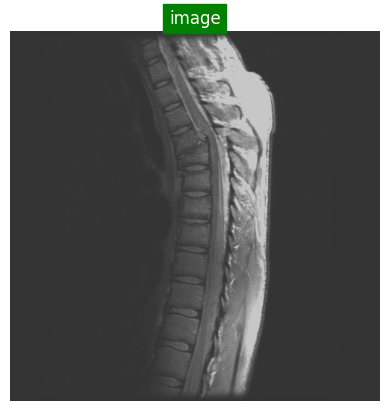

In [6]:
#@title Q5 - Part 1 (10%)
###
# ENTER YOUR CODE HERE.
###
image = cv2.imread("/content/spine.tif", cv2.IMREAD_GRAYSCALE)
print(type(image[0,0]))
print(image.shape)
image1 = image.astype(np.float64)
plt.imshow(image1, cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

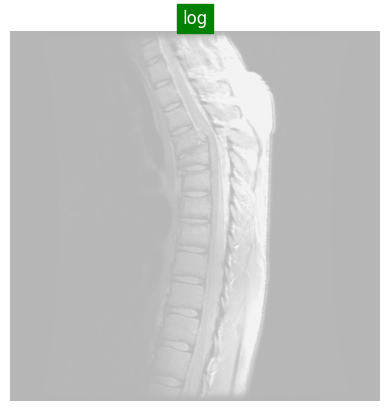

In [13]:
#@title Q5 - Part 2 (10%)
###
# ENTER YOUR CODE HERE.
###
def log_transform(image):
  k = math.e
  n = len(image.shape)
  if n == 2:
    typee = type(image[0,0])
  else:
    typee = type(image[0,0,0])
  l = 256
  if typee == np.uint8:
    l = 256
  elif typee == np.uint16:
    l = 256 * 256
  elif typee == np.uint32:
    l = np.pow(2, 32)
  c = (l - 1)/np.log(l)

  return c * np.log(1+image)

plt.imshow(log_transform(image), cmap="gray", vmin=0, vmax=255)
plt.title('log', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()


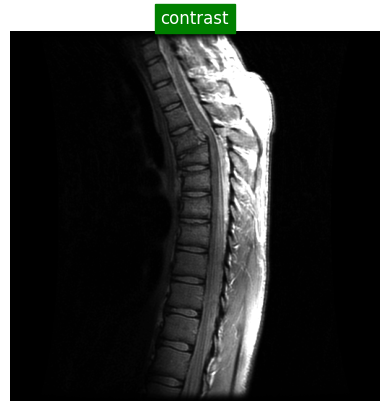

In [14]:
#@title Q5 - Part 3 (30%)
###
# ENTER YOUR CODE HERE.
###
def contrast_stretching(image):
  n = len(image.shape)
  if n == 2:
    typee = type(image[0,0])
  else:
    typee = type(image[0,0,0])
  l = 256
  if typee == np.uint8:
    l = 256
  elif typee == np.uint16:
    l = 256 * 256
  elif typee == np.uint32:
    l = pow(2, 32)
  return (l-1) / (image.max() - image.min()) * (image - image.min())

plt.imshow(contrast_stretching(image), cmap="gray", vmin=0, vmax=255)
plt.title('contrast', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

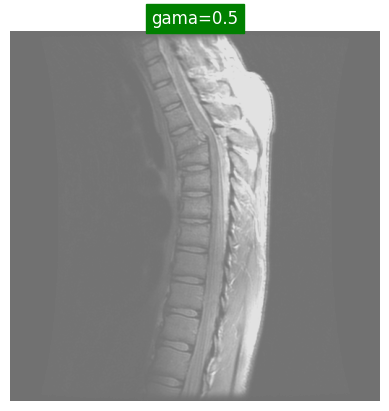

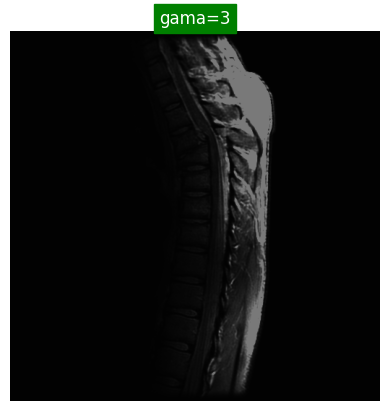

In [15]:
#@title Q5 - Part 4 (15%)
###
# ENTER YOUR CODE HERE.
###
def power_law_transform(image,gama):
  n = len(image.shape)
  if n == 2:
    typee = type(image[0,0])
  else:
    typee = type(image[0,0,0])
  l = 256
  if typee == np.uint8:
    l = 256
  elif typee == np.uint16:
    l = 256 * 256
  elif typee == np.uint32:
    l = 2 ** 32
  c = (l-1) ** (1-gama)
  temp = np.zeros(image.shape)
  if n == 2:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        temp[i,j] = image[i,j] ** gama
  else:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        for k in range(image.shape[2]):
          temp[i,j,k] = image[i,j,k] ** gama
  return c * temp

plt.figure()
plt.imshow(power_law_transform(image,0.5), cmap="gray", vmin=0, vmax=255)
plt.title('gama=0.5', color='white', backgroundcolor='green')
plt.axis('off')
plt.figure()
plt.imshow(power_law_transform(image,3), cmap="gray", vmin=0, vmax=255)
plt.title('gama=3', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

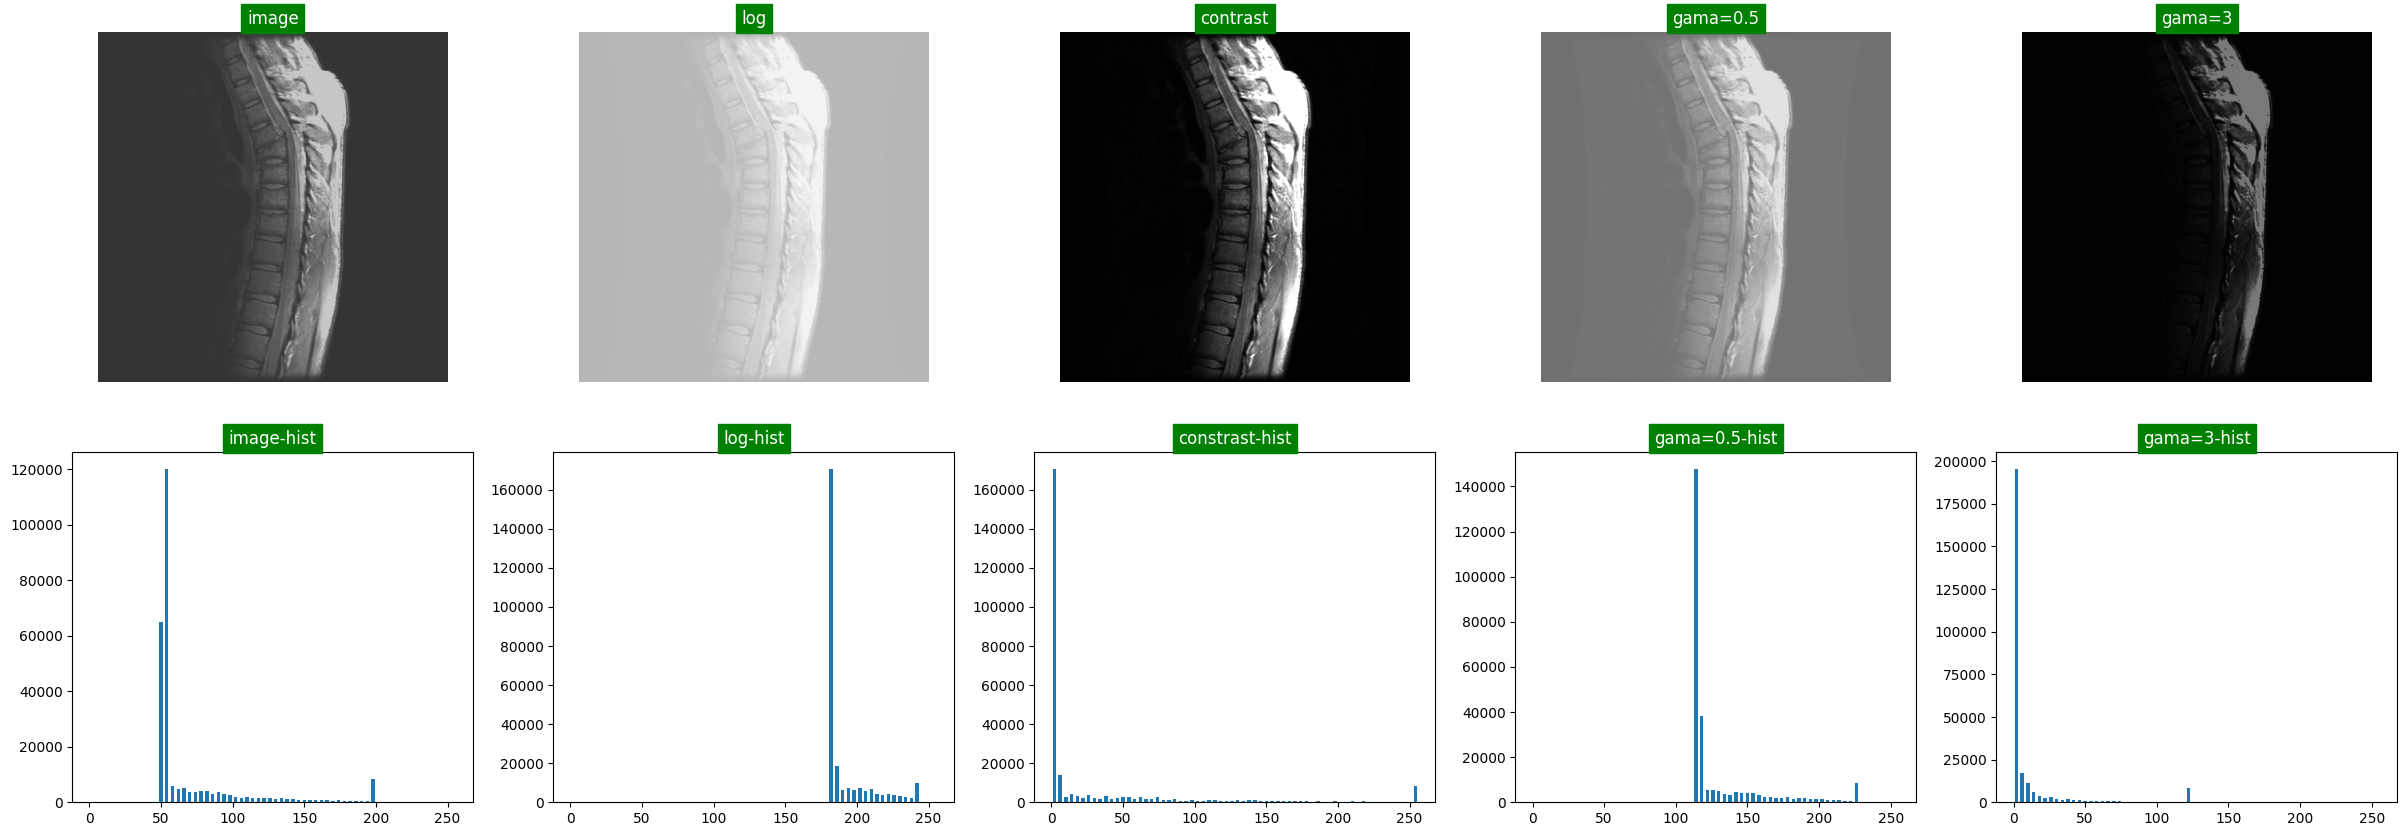

In [ ]:
#@title Q5 - Part 5 (15%)
###
# ENTER YOUR CODE HERE.
###
plt.figure(figsize=(30,10))
plt.subplot(2, 5, 1)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 2)
plt.imshow(log_transform(image), cmap="gray", vmin=0, vmax=255)
plt.title('log', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 3)
plt.imshow(contrast_stretching(image), cmap="gray", vmin=0, vmax=255)
plt.title('contrast', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 4)
plt.imshow(power_law_transform(image,0.5), cmap="gray", vmin=0, vmax=255)
plt.title('gama=0.5', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 5)
plt.imshow(power_law_transform(image,3), cmap="gray", vmin=0, vmax=255)
plt.title('gama=3', color='white', backgroundcolor='green')
plt.axis('off')


bins = []
for i in range(257):
  if i%4==0:
    bins.append(i)

plt.subplot(2, 5, 6)
plt.hist(image.ravel(), bins=bins, rwidth=0.6)
plt.title('image-hist', color='white', backgroundcolor='green')

plt.subplot(2, 5, 7)
plt.hist(log_transform(image).ravel(), bins=bins, rwidth=0.6)
plt.title('log-hist', color='white', backgroundcolor='green')

plt.subplot(2, 5, 8)
plt.hist(contrast_stretching(image).ravel(), bins=bins, rwidth=0.6)
plt.title('constrast-hist', color='white', backgroundcolor='green')

plt.subplot(2, 5, 9)
plt.hist(power_law_transform(image,0.5).ravel(), bins=bins, rwidth=0.6)
plt.title('gama=0.5-hist', color='white', backgroundcolor='green')

plt.subplot(2, 5, 10)
plt.hist(power_law_transform(image,3).ravel(), bins=bins, rwidth=0.6)
plt.title('gama=3-hist', color='white', backgroundcolor='green')

plt.show()

Q5 - Part 6 Explanation (20%):
<div dir=rtl>
<font size = "5">همانطور که مشاهده میشود با اعمال  log میتوانیم کنتراست تصویر را کم کنیم به شکلی که پیکسل هایی با شدت کمتر مقدار بیشتری شدت آنها بیشتر میشود نسبت به پیکسل هایی که شدت بیتشری دارند.
در  constrast stretching برعکس است یعنی باعث میشود که کنتراست بیشتر شود.
در بخش  power مشاهده میشود که کنتراست مقداری کم میشود و برای گامای کوچکتر از یک به سمت شدت بیشتر حرکت میکند و برای گامای بزرگتر از یک به سمت شدت کمتر</font><br />
</div>

# Question 6: (35%)

<class 'numpy.uint8'>
(706, 320)


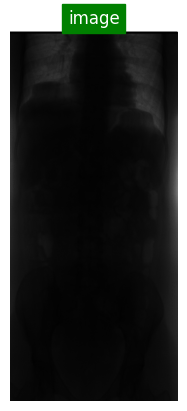

In [ ]:
#@title Q6 - Part 1 (5%)
###
# ENTER YOUR CODE HERE.
###
image = cv2.imread("/content/spineXray.tif", cv2.IMREAD_GRAYSCALE)
print(type(image[0,0]))
print(image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

In [ ]:
#@title Q6 - Part 2 (5%)
###
# ENTER YOUR CODE HERE.
###
image1 = cv2.equalizeHist(image)
cv2.imwrite("q6-2.png", image1)

True

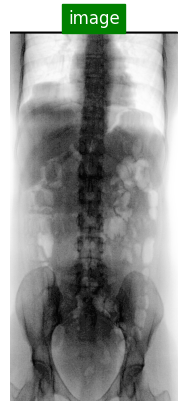

In [ ]:
#@title Q6 - Part 3 (25%)
###
# ENTER YOUR CODE HERE.
###
def equlizeHist(image):
  n = len(image.shape)
  if n == 2:
    typee = type(image[0,0])
  else:
    typee = type(image[0,0,0])
  l = 256
  if typee == np.uint8:
    l = 256
  elif typee == np.uint16:
    l = 256 * 256
  elif typee == np.uint32:
    l = 2 ** 32
  sk = np.zeros((l))
  nk = np.zeros((l))
  if n == 2:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        nk[image[i,j]] += 1
  else:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        for k in range(image.shape[2]):
          nk[image[i,j,k]] += 1
  for i in range(l):
    for j in range(i+1):
      sk[i] += (l-1)/(image.shape[0] * image.shape[1]) * nk[j]

  res = np.zeros(image.shape)
  if n == 2:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        res[i,j] = sk[image[i,j]]
  else:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        for k in range(image.shape[2]):
          res[i,j,k] = sk[image[i,j,k]]
  return res
plt.imshow(equlizeHist(image), cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

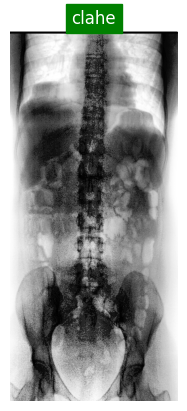

In [ ]:
#@title Q6 - Part 4 (20%)
###
# ENTER YOUR CODE HERE.
###
clahe = cv2.createCLAHE(clipLimit=60.0, tileGridSize=(3,3))
clahe_image = clahe.apply(image)
plt.imshow(equlizeHist(clahe_image), cmap="gray", vmin=0, vmax=255)
plt.title('clahe', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

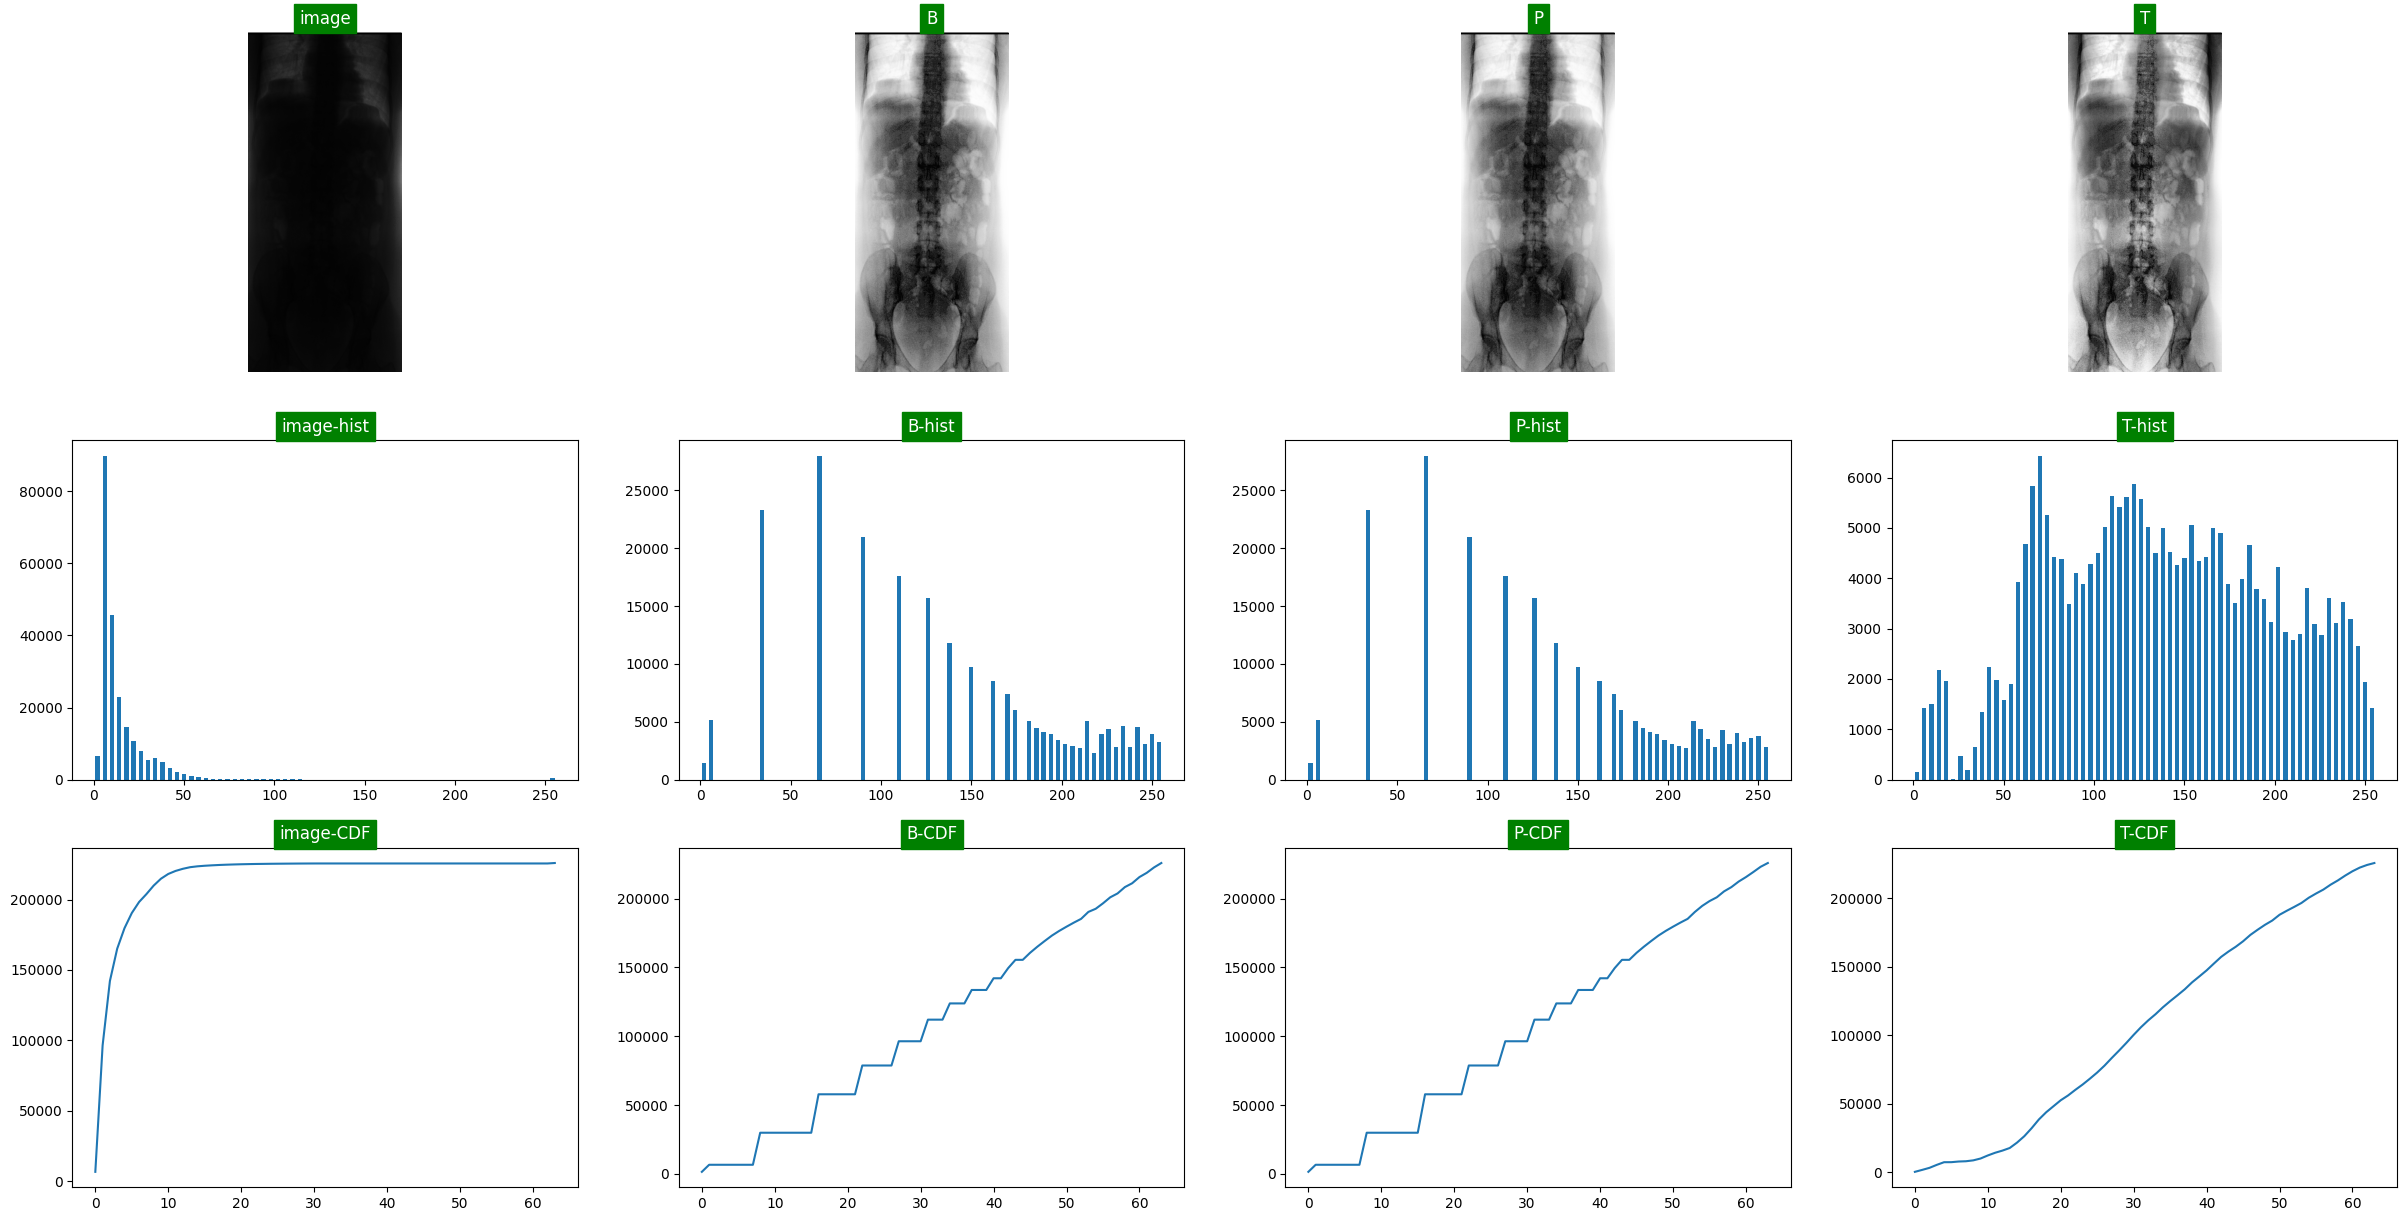

In [ ]:
#@title Q6 - Part 5 (10%)
###
# ENTER YOUR CODE HERE.
###
plt.figure(figsize=(30,15))
plt.subplot(3, 4, 1)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(cv2.equalizeHist(image), cmap="gray", vmin=0, vmax=255)
plt.title('B', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(equlizeHist(image), cmap="gray", vmin=0, vmax=255)
plt.title('P', color='white', backgroundcolor='green')
plt.axis('off')

clahe = cv2.createCLAHE(clipLimit=60.0, tileGridSize=(3,3))
plt.subplot(3, 4, 4)
plt.imshow(clahe.apply(image), cmap="gray", vmin=0, vmax=255)
plt.title('T', color='white', backgroundcolor='green')
plt.axis('off')


bins = []
for i in range(257):
  if i%4==0:
    bins.append(i)

plt.subplot(3, 4, 5)
data1=plt.hist(image.ravel(), bins=bins, rwidth=0.6)
plt.title('image-hist', color='white', backgroundcolor='green')

plt.subplot(3, 4, 6)
data2=plt.hist(cv2.equalizeHist(image).ravel(), bins=bins, rwidth=0.6)
plt.title('B-hist', color='white', backgroundcolor='green')

plt.subplot(3, 4, 7)
data3=plt.hist(equlizeHist(image).ravel(), bins=bins, rwidth=0.6)
plt.title('P-hist', color='white', backgroundcolor='green')

plt.subplot(3, 4, 8)
data4=plt.hist(clahe.apply(image).ravel(), bins=bins, rwidth=0.6)
plt.title('T-hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 9)
plt.plot(np.cumsum(data1[0]))
plt.title('image-CDF', color='white', backgroundcolor='green')

plt.subplot(3, 4, 10)
plt.plot(np.cumsum(data2[0]))
plt.title('B-CDF', color='white', backgroundcolor='green')

plt.subplot(3, 4, 11)
plt.plot(np.cumsum(data3[0]))
plt.title('P-CDF', color='white', backgroundcolor='green')

plt.subplot(3, 4, 12)
plt.plot(np.cumsum(data4[0]))
plt.title('T-CDF', color='white', backgroundcolor='green')
plt.show()

Q6 - Part 6 Explanation (10%):
<div dir=rtl>
<font size = "5">همانطور که مشاهده میشود در تصویر اولیه اکثر پیکسل ها شدت های پایین دارند و سمت چپ هیستوگرام قرار گرفته اند و توزیع تجمعی آنها هم در همان ابتدا به حد بالای خود میرسد ولی در تصویر دومو سوم که مشابه هم هستند زیرا یک کار را انجام میدهند مشاهده میشود که که توزیع باز تر شده و کنتراست بالاتر رفته است و نمودار توزیع تجمعی هم به مراتب بالا میرود ولی شدت ها گگسسته شده اند. در تصویر آخر مشاهده میشود که شدت ها به شکل بهتری توزیع شده اند و دیگر گسسته نیستند.</font><br />
</div>

(512, 512)


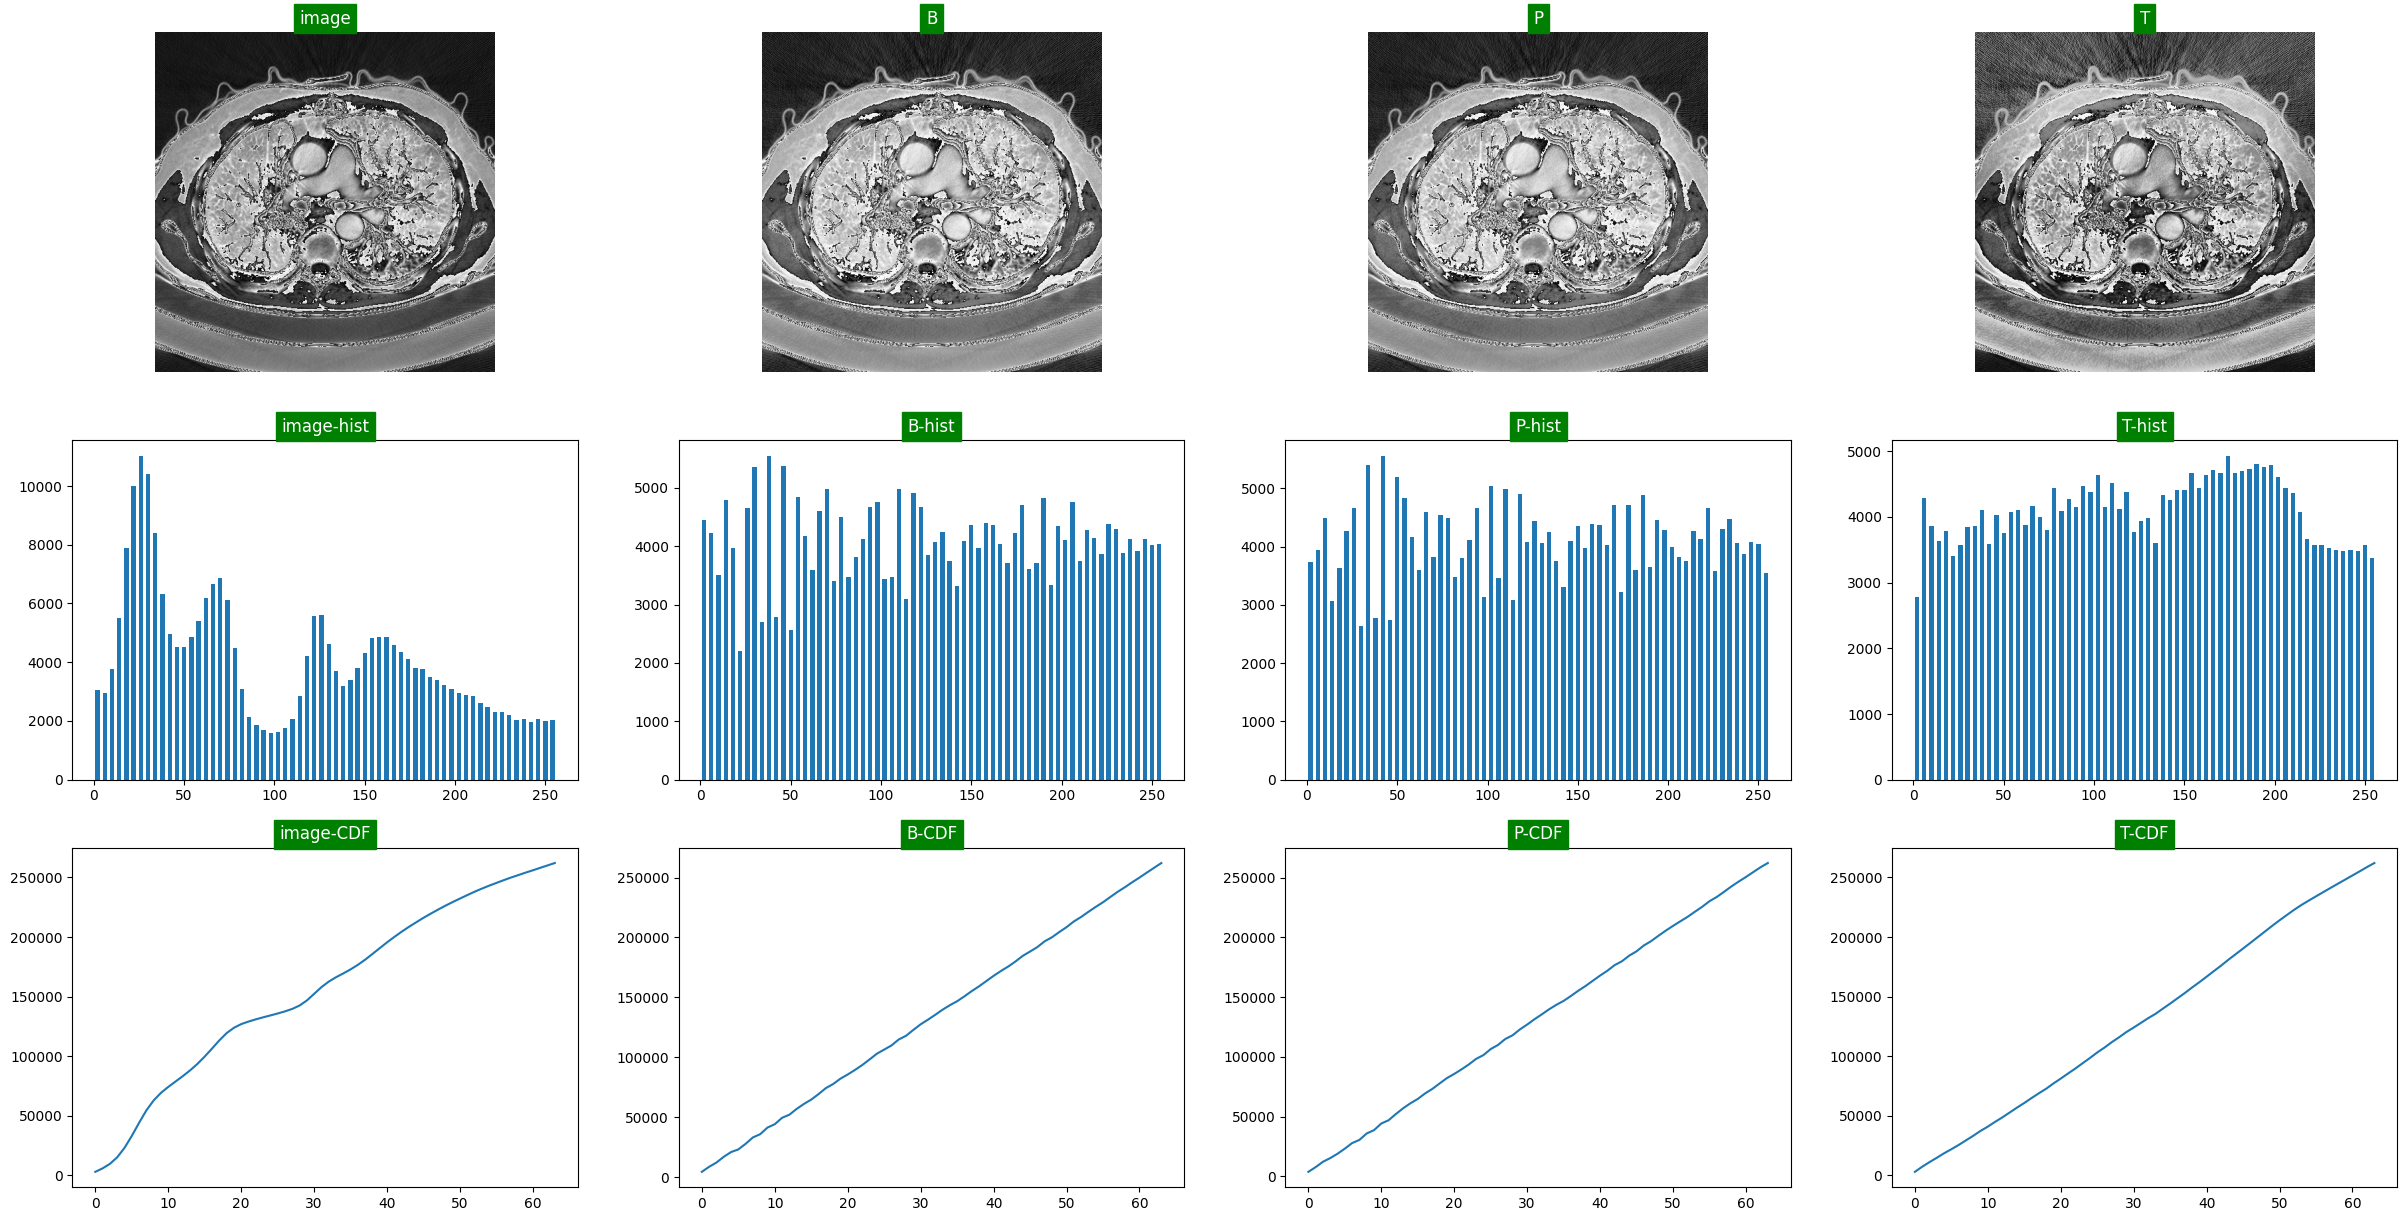

In [ ]:
#@title Q6 - Part 7 (25%)
###
# ENTER YOUR CODE HERE.
###
pydicom_image = np.uint8(np.array(pydicom.dcmread("/content/file.dcm").pixel_array))
plt.figure(figsize=(30,15))
plt.subplot(3, 4, 1)
plt.imshow(pydicom_image, cmap="gray", vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(cv2.equalizeHist(pydicom_image), cmap="gray", vmin=0, vmax=255)
plt.title('B', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(equlizeHist(pydicom_image), cmap="gray", vmin=0, vmax=255)
plt.title('P', color='white', backgroundcolor='green')
plt.axis('off')

clahe = cv2.createCLAHE(clipLimit=60.0, tileGridSize=(3,3))
plt.subplot(3, 4, 4)
plt.imshow(clahe.apply(pydicom_image), cmap="gray", vmin=0, vmax=255)
plt.title('T', color='white', backgroundcolor='green')
plt.axis('off')


bins = []
for i in range(257):
  if i%4==0:
    bins.append(i)

plt.subplot(3, 4, 5)
data1=plt.hist(pydicom_image.ravel(), bins=bins, rwidth=0.6)
plt.title('image-hist', color='white', backgroundcolor='green')

plt.subplot(3, 4, 6)
data2=plt.hist(cv2.equalizeHist(pydicom_image).ravel(), bins=bins, rwidth=0.6)
plt.title('B-hist', color='white', backgroundcolor='green')

plt.subplot(3, 4, 7)
data3=plt.hist(equlizeHist(pydicom_image).ravel(), bins=bins, rwidth=0.6)
plt.title('P-hist', color='white', backgroundcolor='green')

plt.subplot(3, 4, 8)
data4=plt.hist(clahe.apply(pydicom_image).ravel(), bins=bins, rwidth=0.6)
plt.title('T-hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 9)
plt.plot(np.cumsum(data1[0]))
plt.title('image-CDF', color='white', backgroundcolor='green')

plt.subplot(3, 4, 10)
plt.plot(np.cumsum(data2[0]))
plt.title('B-CDF', color='white', backgroundcolor='green')

plt.subplot(3, 4, 11)
plt.plot(np.cumsum(data3[0]))
plt.title('P-CDF', color='white', backgroundcolor='green')

plt.subplot(3, 4, 12)
plt.plot(np.cumsum(data4[0]))
plt.title('T-CDF', color='white', backgroundcolor='green')
plt.show()

Q6 - Part 7 Explanation:
<div dir=rtl>
<font size = "5">در این تصویر برخلاف مورد قبلی در تصویر اصلی توزیع پیکسل ها مناسب است و در مراحل بعدی کنتراست تغییر زیادی نمیکند با این حال شدت پیکسل ها تغییر میکند ولی باعث گسسته شدن نمیشود وهمچنین تعداد شدت های مختلف به یکدیگر نزدیکتر میشود.</font><br />
</div>

<div dir=rtl>
<font size = "5">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)

</font><br />
</div>


<div dir=rtl>
<font size = "5">
**	حتماً توجه کنید که در هنگام تحویل و آخرین ویرایش روی کد خود، خروجی همه‌ی بلاک‌ها، خروجی درست و نهایی همان بلاک باشد. (بطور مثال ممکن است تغییری در کد بدهید و رویت کنید که خروجی درست نیست و فقط تغییرتان را undo کرده ولی دوباره اجرایش نکنید و خروجی سلول همان خروجی دوم که جواب اشتباهی بود بماند).

</font><br />
</div>


<div dir=rtl>
<font size = "5">	**	نکته مهم: لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font><br />
</div>


<div dir=rtl>
<font size = "5">	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW1_Num باشند که Num شماره دانشجویی شما است مانند HW1_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font><br />
</div>
